##Importar dataset METERS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the file path
file_path = "/content/drive/MyDrive/Colab Notebooks/Dataset_2/Meters_16n.csv"

# Read the CSV file, specifying the 'Indispensability Values' column
df = pd.read_csv(file_path)
#indispensability_df = pd.read_csv(file_path, usecols=['Meter','Indispensability'])

# Display the DataFrame (optional)
#display(df)
#display(indispensability_df)

exp_title = "Exp_04"

Repeat Weights until length reaches 512

In [ ]:
import math

def repeat_to_length(s, target_length):
  """Repeats a string until it reaches the target length."""
  # Calculate the number of repetitions needed
  num_repeats = math.ceil(target_length / len(s.split()))
  # Repeat and truncate to the target length
  repeated_s = ' '.join([s] * num_repeats)
  repeated_s = ' '.join(repeated_s.split()[:target_length])
  return repeated_s

df['repeated_Weights'] = df['Weights R=0.3'].astype(str).apply(lambda x: repeat_to_length(x, 512))

#display(df)

####DFT

In [ ]:
import pandas as pd
import numpy as np

def compute_dft(signal):
    try:
        # 1. Convert to numerical list of floats:
        signal = [float(i) for i in signal.split()]
        # 2. Perform DFT calculation:
        dft = np.fft.fft(signal)

        # 3. Normalize by DC energy:
        dc_energy = np.real(dft[0])  # Get real part of DC component
        if dc_energy != 0:
            dft = dft / dc_energy  # Normalize if DC energy is not zero
        else:
            print("Warning: DC energy is zero. Normalization skipped.")

        # 4. Exclude DC component and symmetric part:
        dft = dft[1:len(dft) // 2]  # Exclude DC and symmetric part

        # 5. Calculate magnitudes and phases:
        magnitudes = np.abs(dft)
        phases = np.angle(dft)

        # 6. Unwrap the phase
        unwrapped_phases = np.unwrap(phases)

        return dft.tolist(), magnitudes.tolist(), phases.tolist(), unwrapped_phases.tolist()  # Return as lists

    except (ValueError, TypeError) as e:
        print(f"Error computing DFT for {signal}: {e}")
        return [np.nan], [np.nan], [np.nan], [np.nan]  # Return list of NaNs on error

# ... (your code to load the DataFrame df) ...

# Assuming 'Rhythm Binary' column contains strings of binary values
df[['DFT', 'DFT Magnitude', 'DFT Phase', 'DFT Phase_Unwrap']] = df['repeated_Weights'].apply(compute_dft).apply(pd.Series)
display(df)

,Index,Group,Meter,Strat level,#Pulses + Prime Factors,Metrical Levels,Indispensability,Weights R=0.5,Weights R=0.3,repeated_Weights,DFT,DFT Magnitude,DFT Phase,DFT Phase_Unwrap
0,0,0,2/2,16n,16 2 2 2 2,0 4 3 4 2 4 3 4 1 4 3 4 2 4 3 4,15 0 8 4 12 2 10 6 14 1 9 5 13 3 11 7,1. 0.070312 0.15625 0.101562 0.375 0.085938 0....,1. 0.010463 0.04275 0.019913 0.195 0.015188 0....,1. 0.010463 0.04275 0.019913 0.195 0.015188 0....,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,3/4,16n,12 3 2 2,0 3 2 3 1 3 2 3 1 3 2 3,11 0 6 3 9 1 7 4 10 2 8 5,1. 0.145833 0.333333 0.208333 0.666667 0.16666...,1. 0.0375 0.16 0.069 0.533333 0.048 0.23 0.079...,1. 0.0375 0.16 0.069 0.533333 0.048 0.23 0.079...,[(-0.0006337742678036884+2.1379581847115884e-0...,"[0.0006341347719925623, 0.0006380945839137034,...","[3.107871692166817, 3.0744644950829056, 3.0416...","[3.107871692166817, 3.0744644950829056, 3.0416..."
2,2,0,4/4,16n,16 2 2 2 2,0 4 3 4 2 4 3 4 1 4 3 4 2 4 3 4,15 0 8 4 12 2 10 6 14 1 9 5 13 3 11 7,1. 0.070312 0.15625 0.101562 0.375 0.085938 0....,1. 0.010463 0.04275 0.019913 0.195 0.015188 0....,1. 0.010463 0.04275 0.019913 0.195 0.015188 0....,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,2,5/4,16n,20 5 2 2,0 3 2 3 1 3 2 3 1 3 2 3 1 3 2 3 1 3 2 3,19 0 10 5 15 1 11 6 16 3 13 8 18 2 12 7 17 4 14 9,1. 0.1375 0.3 0.2 0.6 0.15 0.35 0.2125 0.7 0.1...,1. 0.0333 0.132 0.0648 0.44 0.0396 0.174 0.071...,1. 0.0333 0.132 0.0648 0.44 0.0396 0.174 0.071...,[(-0.0018453736383350953+8.42283880159498e-06j...,"[0.0018453928604163356, 0.001857831829788989, ...","[3.1370283853371097, 3.132545228445434, 3.1282...","[3.1370283853371097, 3.132545228445434, 3.1282..."
4,4,0,6/4,16n,24 2 3 2 2,0 4 3 4 2 4 3 4 2 4 3 4 1 4 3 4 2 4 3 4 2 4 3 4,23 0 12 6 18 2 14 8 20 4 16 10 22 1 13 7 19 3 ...,1. 0.067708 0.145833 0.098958 0.3125 0.078125 ...,1. 0.009675 0.0375 0.019125 0.1425 0.012825 0....,1. 0.009675 0.0375 0.019125 0.1425 0.012825 0....,[(0.0038178119159052747+0.00028328871211039526...,"[0.003828307761875666, 0.003858747407054439, 0...","[0.07406611641243777, 0.14793090153056002, 0.2...","[0.07406611641243777, 0.14793090153056002, 0.2..."
5,5,2,7/4,16n,28 7 2 2,0 3 2 3 1 3 2 3 1 3 2 3 1 3 2 3 1 3 2 3 1 3 2 ...,27 0 14 7 21 4 18 11 25 1 15 8 22 5 19 12 26 2...,1. 0.133929 0.285714 0.196429 0.571429 0.16964...,1. 0.0315 0.12 0.063 0.4 0.0495 0.24 0.081 0.8...,1. 0.0315 0.12 0.063 0.4 0.0495 0.24 0.081 0.8...,[(-0.000593588464097659+8.171252077433748e-05j...,"[0.0005991862821870293, 0.0006232069143124978,...","[3.004793897124006, 2.874334617093281, 2.75506...","[3.004793897124006, 2.874334617093281, 2.75506..."
6,6,2,9/4,16n,36 3 3 2 2,0 4 3 4 2 4 3 4 2 4 3 4 1 4 3 4 2 4 3 4 2 4 3 ...,35 0 18 9 27 3 21 12 30 6 24 15 33 1 19 10 28 ...,1. 0.065972 0.138889 0.097222 0.291667 0.07638...,1. 0.00915 0.034 0.0186 0.125 0.0123 0.055 0.0...,1. 0.00915 0.034 0.0186 0.125 0.0123 0.055 0.0...,[(0.004475859433065267+0.0004253613350901323j)...,"[0.004496026015266036, 0.0045585947560520595, ...","[0.09474999748170952, 0.18940851635113867, 0.2...","[0.09474999748170952, 0.18940851635113867, 0.2..."
7,7,2,10/4,16n,40 5 2 2 2,0 4 3 4 2 4 3 4 1 4 3 4 2 4 3 4 1 4 3 4 2 4 3 ...,39 0 20 10 30 5 25 15 35 1 21 11 31 6 26 16 36...,1. 0.065625 0.1375 0.096875 0.3 0.08125 0.2 0....,1. 0.009045 0.0333 0.018495 0.132 0.01377 0.06...,1. 0.009045 0.0333 0.018495 0.132 0.01377 0.06...,[(-0.0016324118536717675-2.626147549622042e-05...,"[0.001632623081149882, 0.0016865028583144214, ...","[-3.1255065107310944, -3.1072920686851466, -3....","[-3.1255065107310944, -3.1072920686851466, -3...."
8,8,1,12/4,16n,48 2 2 3 2 2,0 5 4 5 3 5 4 5 3 5 4 5 2 5 4 5 3 5 4 5 3 5 4 ...,47 0 24 12 36 4 28 

####EXPORT DATAFRAME

In [ ]:
# prompt: Export the data frame df to a CSV file.

# Export the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/output EXP_04b.csv', index=False)

####Compute Pairwise Distance Matrix - CSV export

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine  # For cosine distance

def calculate_pairwise_distances(df, column_name, distance_metric='euclidean'):
    """Calculates pairwise distances between rows in a DataFrame column."""

    num_rows = len(df)
    distances = np.zeros((num_rows, num_rows))

    for i in range(num_rows):
        for j in range(i + 1, num_rows):
            if distance_metric == 'euclidean':
                dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            elif distance_metric == 'cosine':
                u = np.array(df.iloc[i][column_name])
                v = np.array(df.iloc[j][column_name])
                if np.all(u == 0) or np.all(v == 0):
                    dist = 1.0  # Cosine distance is 1 for zero vectors
                else:
                    dist = cosine(u, v)
            else:
                raise ValueError("Invalid distance_metric. Choose 'euclidean' or 'cosine'.")

            distances[i, j] = dist
            distances[j, i] = dist  # Ensure symmetry

    return distances

# Choose the column and distance metric
column_name = 'DFT Magnitude'  # Replace with your desired column
distance_metric = 'euclidean'  # or 'cosine'

# Calculate distances
#distances_array = calculate_pairwise_distances(df, column_name, distance_metric)
euc_distances_array = calculate_pairwise_distances(df, column_name, 'euclidean')
cos_distances_array = calculate_pairwise_distances(df, column_name, 'cosine')


# Create a DataFrame from the distances array
euc_distances_df = pd.DataFrame(euc_distances_array, index=df['Displacement'], columns=df['Displacement'])
cos_distances_df = pd.DataFrame(cos_distances_array, index=df['Displacement'], columns=df['Displacement'])

# Export to CSV
euc_distances_df.to_csv('/content/drive/MyDrive/Colab Notebooks/euc_pairwise_distances.csv')
cos_distances_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cos_pairwise_distances.csv')

##Viz II

####UMAP - Euclidean Distance - Group Coloring - PDF export

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-6-f24aed3bef9b>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


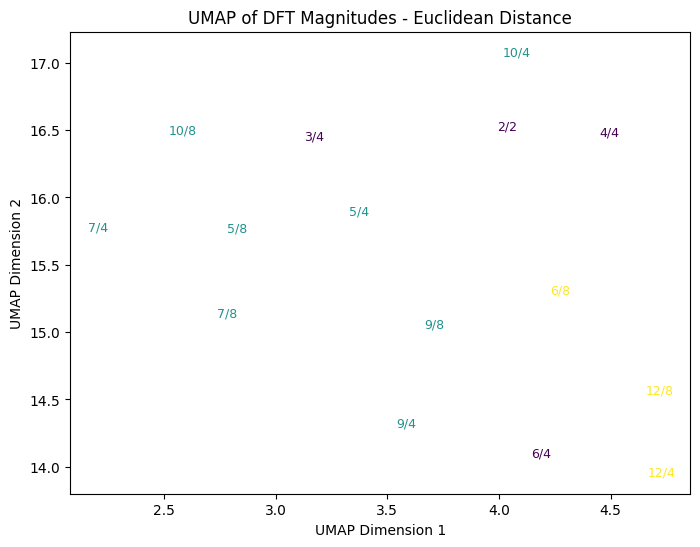

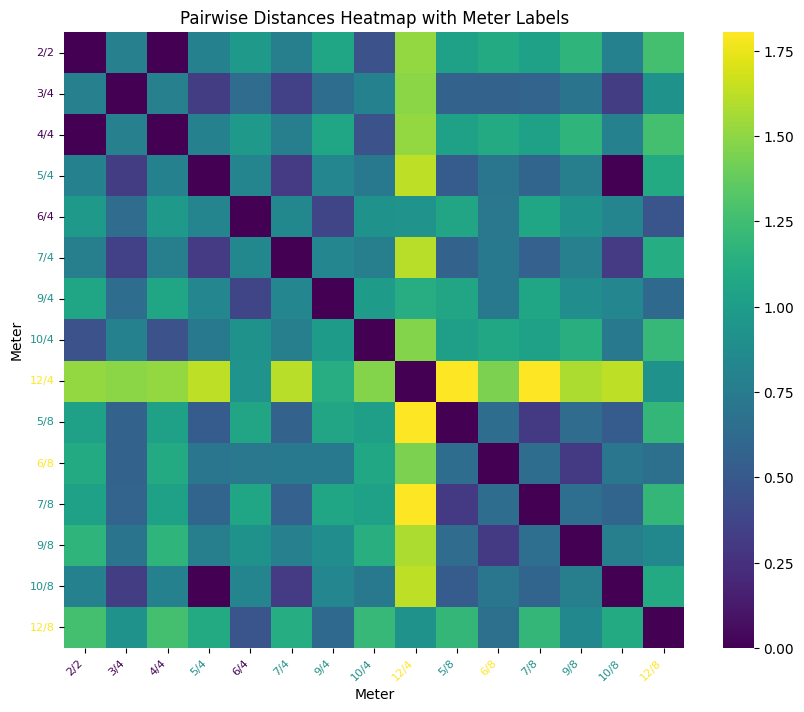

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-6-f24aed3bef9b>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


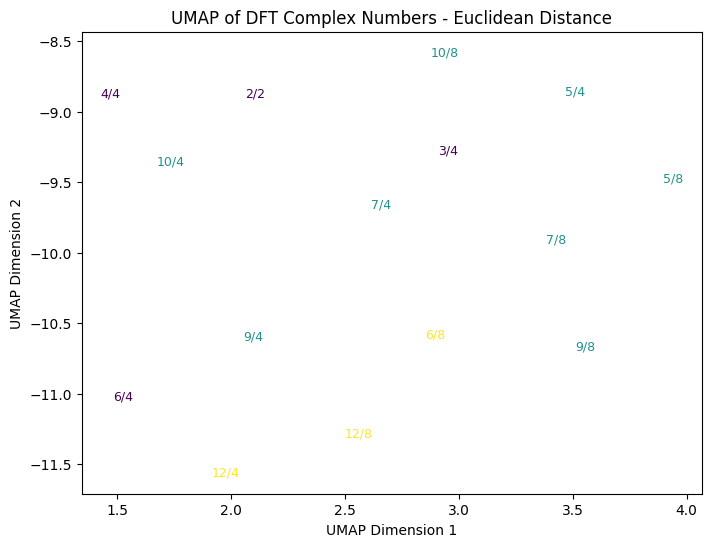

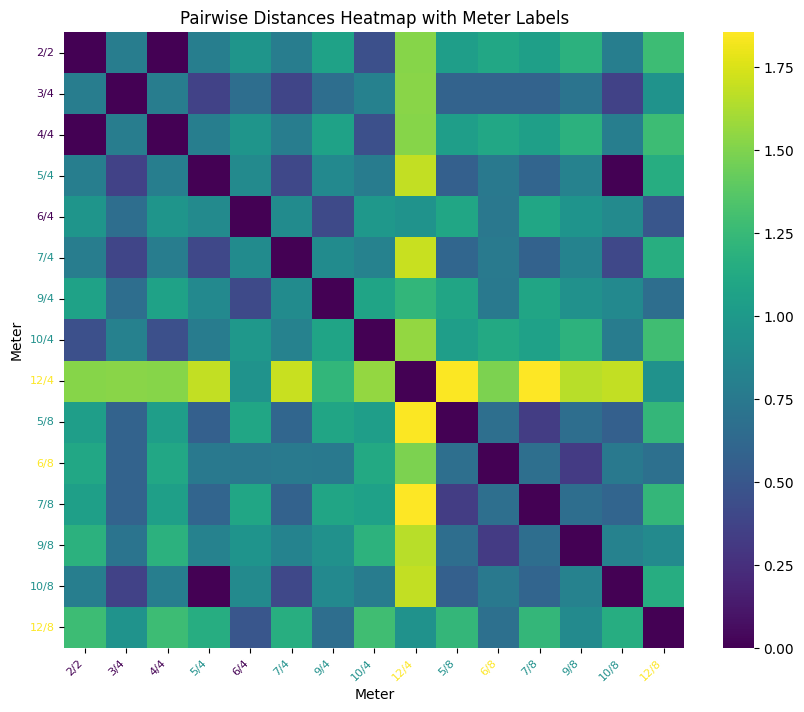

In [ ]:
try:
    import umap
    print(f"Package '{umap}' is installed.")
except ImportError:
    print("Package '{umap}' is not installed.")
    !pip install umap-learn
    import umap # Import UMAP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_umap(df, column_name, title):
    """Computes and visualizes UMAP for a given column."""

    # 1. Compute pairwise distances using Euclidean distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist

    # 2. Apply UMAP
    reducer = umap.UMAP(n_components=2, metric='precomputed') # Initialize UMAP with precomputed distances
    transformed_data = reducer.fit_transform(distances)

    # 3. Visualize the UMAP results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Get unique group values and assign colors
    unique_groups = df['Group'].unique()
    colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap

    # Use 'Meter' column for labels and color based on 'Group'
    for i in range(len(df)):
        label = df['Meter'].iloc[i]
        group = df['Group'].iloc[i]
        color_index = np.where(unique_groups == group)[0][0]  # Get index of group in unique_groups
        color = colors(color_index)  # Get color from colormap
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)


    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1') # Update x-axis label
    ax.set_ylabel('UMAP Dimension 2') # Update y-axis label


    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    # Plot the distance matrix with Meter labels and color based on 'Group'
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))

    # Create a color mapping dictionary (same as before)
    color_mapping = {group: colors(np.where(unique_groups == group)[0][0]) for group in unique_groups}

    # Plot the heatmap (keep it unchanged)
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",  # Use original colormap
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)

    # Apply color to heatmap labels only
    for ticklabel in ax_heatmap.get_xticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        group = df.loc[df['Meter'] == meter, 'Group'].iloc[0]  # Get corresponding group
        ticklabel.set_color(color_mapping[group])  # Set color based on group

    for ticklabel in ax_heatmap.get_yticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        group = df.loc[df['Meter'] == meter, 'Group'].iloc[0]  # Get corresponding group
        ticklabel.set_color(color_mapping[group])  # Set color based on group


    ax_heatmap.set_title(f'Pairwise Euclidean Distances Heatmap - {exp_title}')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_umap(df, 'DFT Magnitude', f'UMAP of DFT Magnitudes - {exp_title}')
#compute_and_visualize_umap(df, 'DFT Phase', f'UMAP of DFT Phases - {exp_title}')
#compute_and_visualize_umap(df, 'DFT Phase_Unwrap', f'UMAP of DFT Unwrapped Phases - {exp_title}')
compute_and_visualize_umap(df, 'DFT', f'UMAP of DFT Complex Numbers - {exp_title}')

####t-SNE - Euclidean Distance - Group Coloring - PDF export

KL divergence for t-SNE of DFT Magnitudes - Euclidean Distance: 0.34303098917007446


<ipython-input-7-6a8f5cf72f25>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


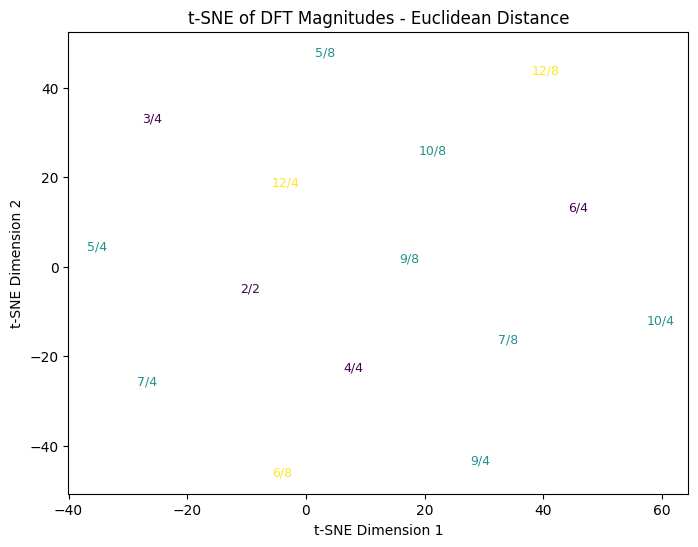

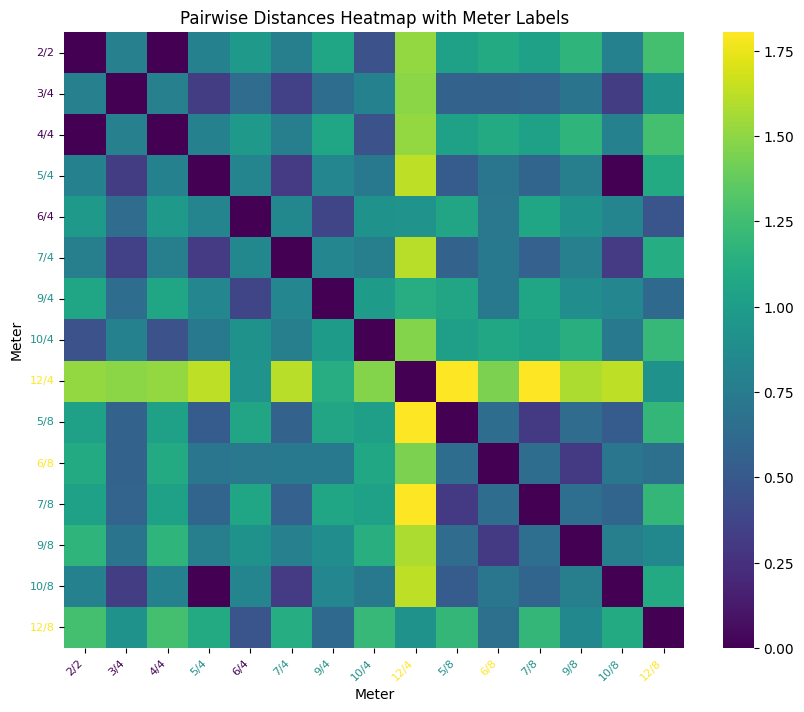

KL divergence for t-SNE of DFT Complex Numbers - Euclidean Distance: 0.34242919087409973


<ipython-input-7-6a8f5cf72f25>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


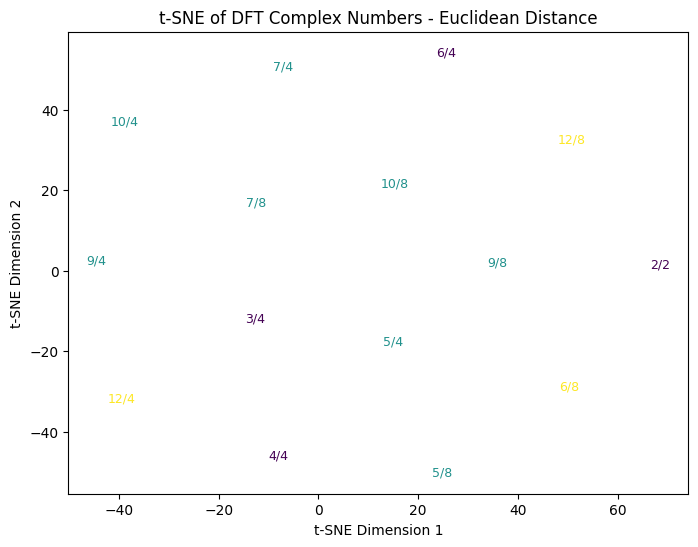

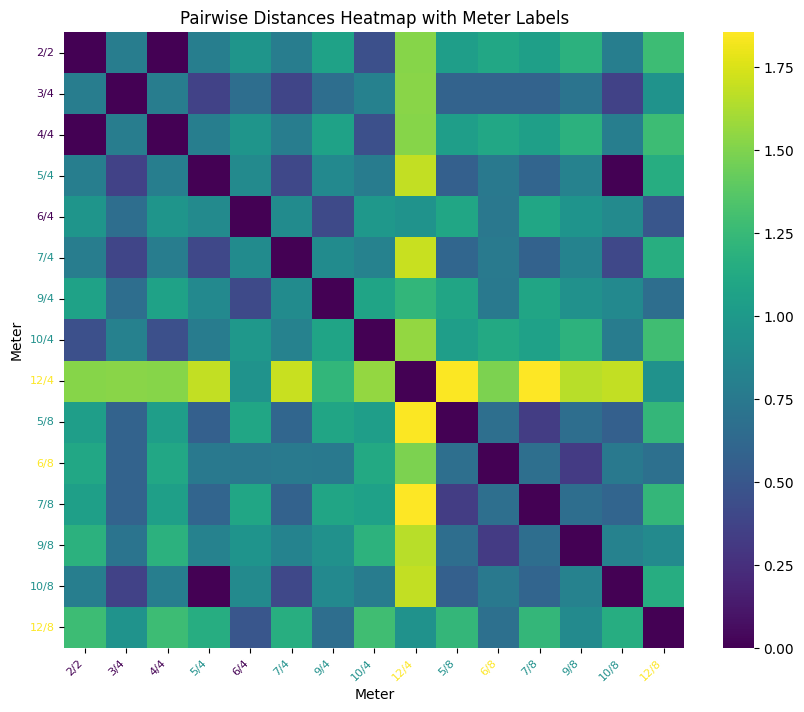

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE # Import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_tsne(df, column_name, title): # Rename function
    """Computes and visualizes t-SNE for a given column."""

    # 1. Compute pairwise distances using Euclidean distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist

    # 2. Apply t-SNE (replace MDS with TSNE)
    # Set perplexity to be less than the number of samples
    perplexity_value = min(30, len(df) - 1)  # Choose the smaller value between 30 and n_samples - 1
    embedding = TSNE(n_components=2, metric='precomputed', perplexity=perplexity_value, init='random') # Use 'random' initialization
    transformed_data = embedding.fit_transform(distances)

    # Print the KL divergence (t-SNE doesn't have stress)
    print(f"KL divergence for {title}: {embedding.kl_divergence_}")

    # 3. Visualize the t-SNE results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)


    # Get unique group values and assign colors
    unique_groups = df['Group'].unique()
    colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap

    # Use 'Meter' column for labels and color based on 'Group'
    for i in range(len(df)):
        label = df['Meter'].iloc[i]
        group = df['Group'].iloc[i]
        color_index = np.where(unique_groups == group)[0][0]  # Get index of group in unique_groups
        color = colors(color_index)  # Get color from colormap
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)  # Update title
    ax.set_xlabel('t-SNE Dimension 1')  # Update x-axis label
    ax.set_ylabel('t-SNE Dimension 2')  # Update y-axis label


    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    # Plot the distance matrix with Meter labels and color based on 'Group'
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))

    # Create a color mapping dictionary (same as before)
    color_mapping = {group: colors(np.where(unique_groups == group)[0][0]) for group in unique_groups}

    # Plot the heatmap (keep it unchanged)
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",  # Use original colormap
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)

    # Apply color to heatmap labels only
    for ticklabel in ax_heatmap.get_xticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        group = df.loc[df['Meter'] == meter, 'Group'].iloc[0]  # Get corresponding group
        ticklabel.set_color(color_mapping[group])  # Set color based on group

    for ticklabel in ax_heatmap.get_yticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        group = df.loc[df['Meter'] == meter, 'Group'].iloc[0]  # Get corresponding group
        ticklabel.set_color(color_mapping[group])  # Set color based on group


    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_tsne(df, 'DFT Magnitude', 't-SNE of DFT Magnitudes - Euclidean Distance') # Update function call
#compute_and_visualize_tsne(df, 'DFT Phase', 't-SNE of DFT Phases - Euclidean Distance') # Update function call
#compute_and_visualize_tsne(df, 'DFT Phase_Unwrap', 't-SNE of DFT Unwrapped Phases - Euclidean Distance') # Update function call
compute_and_visualize_tsne(df, 'DFT', 't-SNE of DFT Complex Numbers - Euclidean Distance') # Update function call

####UMAP sorted HEATMAP - Euclidean - Group Coloring - PDF export

Package '{umap}' is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-5-a3903c99dfb5>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


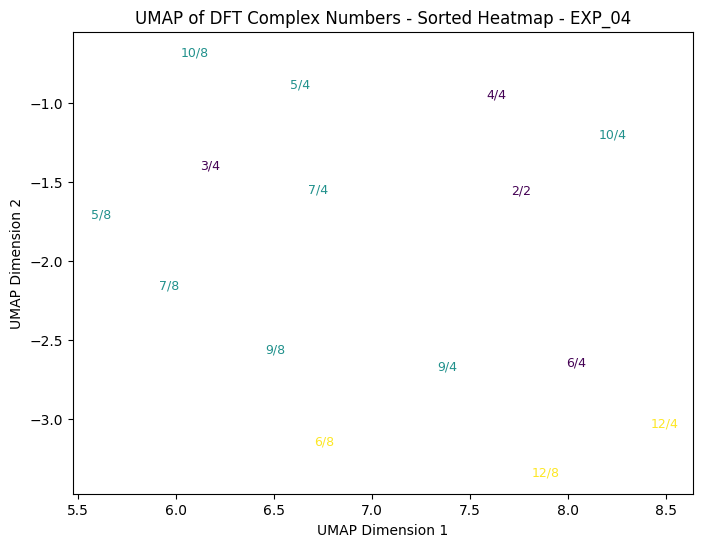

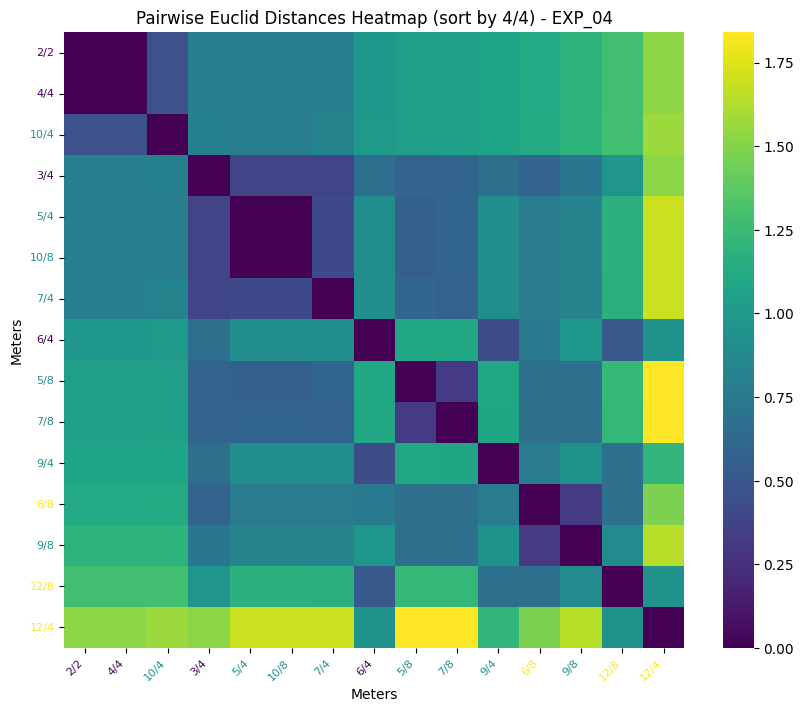

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-5-a3903c99dfb5>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


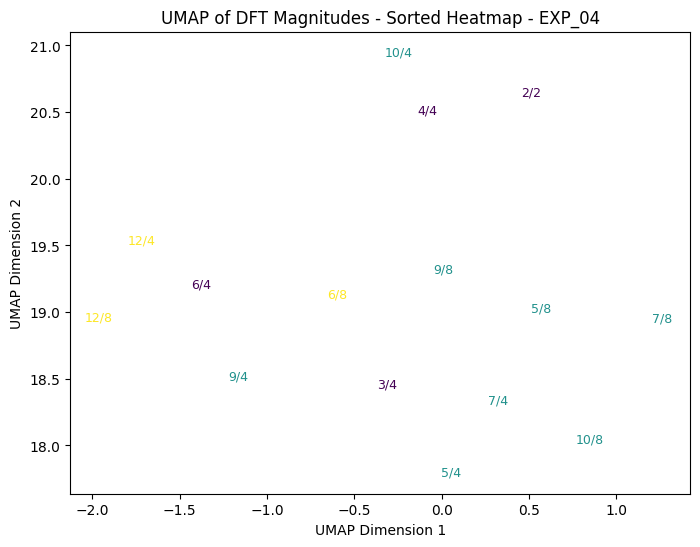

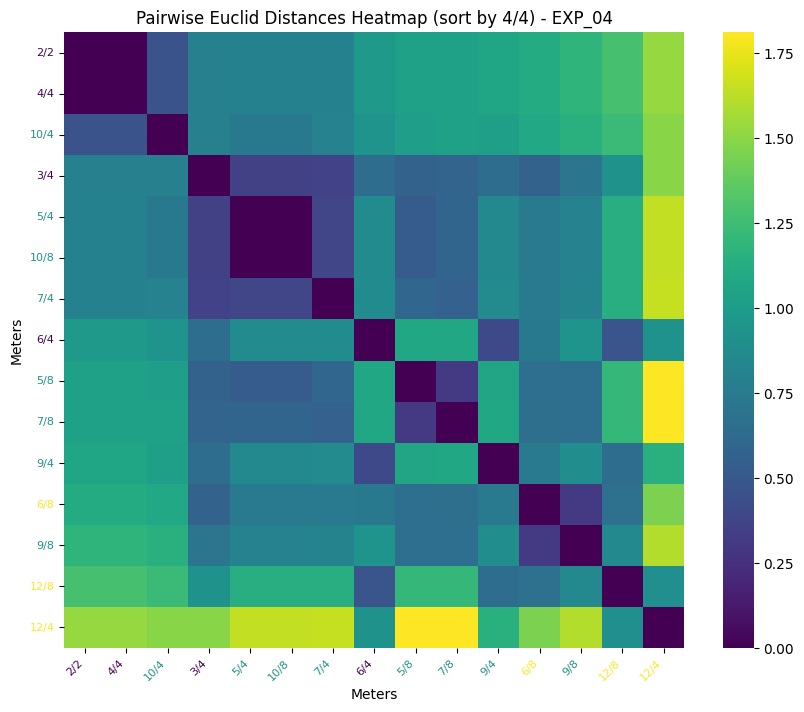

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-5-a3903c99dfb5>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


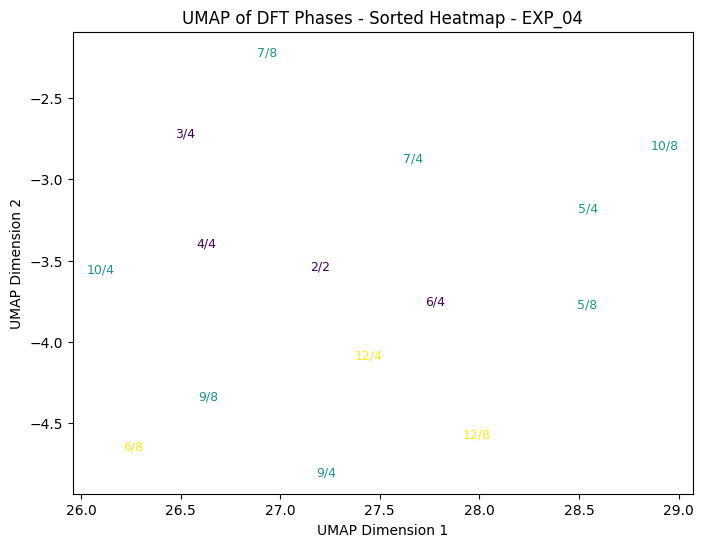

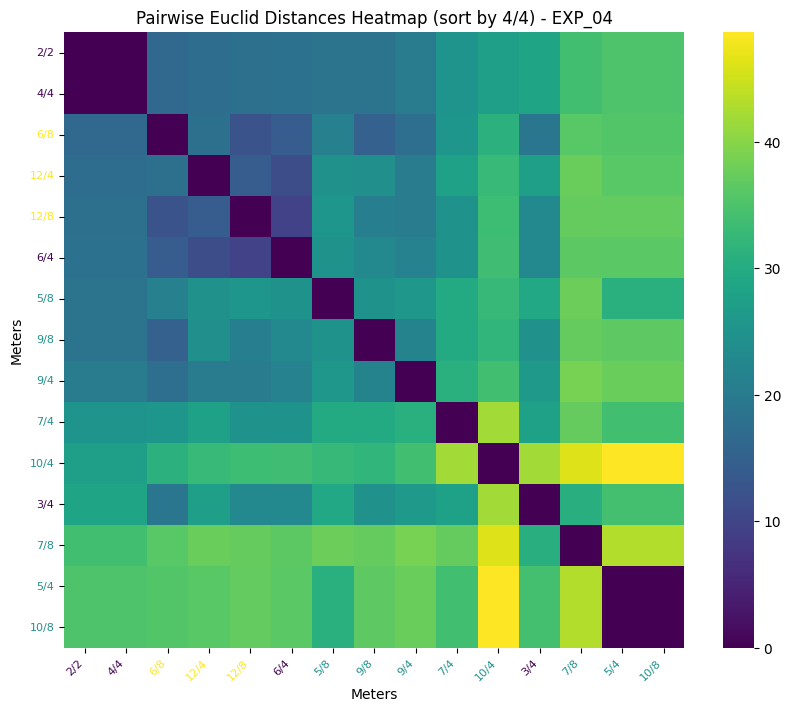

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-5-a3903c99dfb5>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap


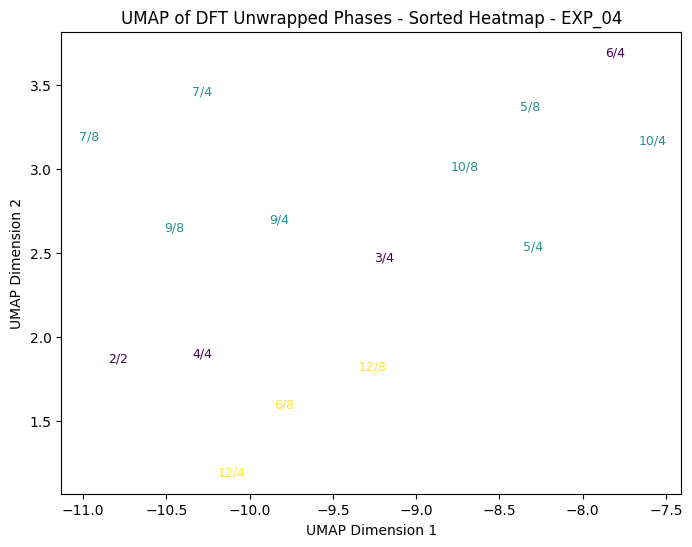

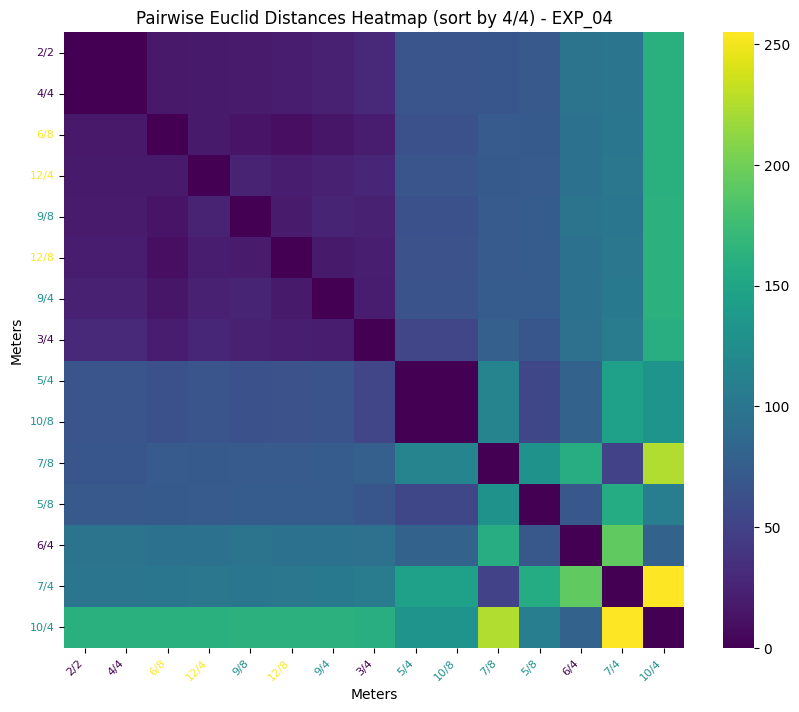

In [ ]:
try:
    import umap
    print(f"Package '{umap}' is installed.")
except ImportError:
    print("Package '{umap}' is not installed.")
    !pip install umap-learn
    import umap # Import UMAP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_umap(df, column_name, title, sort_by_meter=None):  # Add sort_by_meter parameter
    """Computes and visualizes UMAP for a given column."""

    # 1. Compute pairwise distances using Euclidean distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist

    # 2. Apply UMAP
    reducer = umap.UMAP(n_components=2, metric='precomputed') # Initialize UMAP with precomputed distances
    transformed_data = reducer.fit_transform(distances)

    # 3. Visualize the UMAP results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Get unique group values and assign colors
    unique_groups = df['Group'].unique()
    colors = plt.cm.get_cmap('viridis', len(unique_groups))  # You can choose a different colormap

    # Use 'Meter' column for labels and color based on 'Group'
    for i in range(len(df)):
        label = df['Meter'].iloc[i]
        group = df['Group'].iloc[i]
        color_index = np.where(unique_groups == group)[0][0]  # Get index of group in unique_groups
        color = colors(color_index)  # Get color from colormap
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)


    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1') # Update x-axis label
    ax.set_ylabel('UMAP Dimension 2') # Update y-axis label


    # Plot the distance matrix with 'Meter' labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    # Calculate distances from the specified meter (if provided)
    if sort_by_meter:
        sort_index = meter_labels.index(sort_by_meter)  # Get index of the specified meter
        distances_from_sort_meter = distances.iloc[sort_index]  # Get distances from that meter
        sorted_indices = distances_from_sort_meter.sort_values().index  # Sort indices based on distances
        distances = distances.loc[sorted_indices, sorted_indices]  # Reorder distance matrix
        #meter_labels = distances.index.tolist()  # Update meter labels
        # Update meter_labels to reflect the sorted order
        meter_labels = df.loc[sorted_indices, 'Meter'].tolist()  # Update meter labels based on sorted indices
    else:
        meter_labels = df['Meter'].tolist()  # Get the list of meter labels


    # Plot the distance matrix with 'Meter' labels and color based on 'Group'
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))

    # Create a color mapping dictionary
    color_mapping = {group: colors(np.where(unique_groups == group)[0][0]) for group in unique_groups}

    # Plot the heatmap
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",  # Use original colormap
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)


    # Apply color to heatmap labels only ('Meter')
    for ticklabel in ax_heatmap.get_xticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        # Find the index of the meter in the sorted DataFrame
        index = meter_labels.index(meter)
        # Access 'Group' using the index in the sorted DataFrame
        group = df.loc[sorted_indices, 'Group'].iloc[index]
        ticklabel.set_color(color_mapping[group])  # Set color based on group

    for ticklabel in ax_heatmap.get_yticklabels():
        meter = ticklabel.get_text()  # Get the meter label
        group = df.loc[df['Meter'] == meter, 'Group'].iloc[0]  # Get corresponding group
        ticklabel.set_color(color_mapping[group])  # Set color based on group


    ax_heatmap.set_title(f'Pairwise Euclid Distances Heatmap (sort by {sort_by_meter}) - {exp_title}')
    ax_heatmap.set_xlabel("Meters")
    ax_heatmap.set_ylabel("Meters")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# To use the updated function and create a sorted heatmap:
compute_and_visualize_umap(df, 'DFT', f'UMAP of DFT Complex Numbers - Sorted Heatmap - {exp_title}', sort_by_meter='4/4')
compute_and_visualize_umap(df, 'DFT Magnitude', f'UMAP of DFT Magnitudes - Sorted Heatmap - {exp_title}', sort_by_meter='4/4')
compute_and_visualize_umap(df, 'DFT Phase', f'UMAP of DFT Phases - Sorted Heatmap - {exp_title}', sort_by_meter='4/4')
compute_and_visualize_umap(df, 'DFT Phase_Unwrap', f'UMAP of DFT Unwrapped Phases - Sorted Heatmap - {exp_title}', sort_by_meter='4/4')


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
#compute_and_visualize_umap(df, 'DFT Magnitude', 'UMAP of DFT Magnitudes - Euclid Distance')
#compute_and_visualize_umap(df, 'DFT Phase', 'UMAP of DFT Phases - Euclid Distance')
#compute_and_visualize_umap(df, 'DFT Phase_Unwrap', 'UMAP of DFT Unwrapped Phases - Euclid Distance')
#compute_and_visualize_umap(df, 'DFT', 'UMAP of DFT Complex Numbers - Euclid Distance')

##Viz I

####MDS Euclidean Distance PDF export

Stress for Non-metric MDS of DFT Magnitudes (Euclidean Distance): 0.2785181279184866


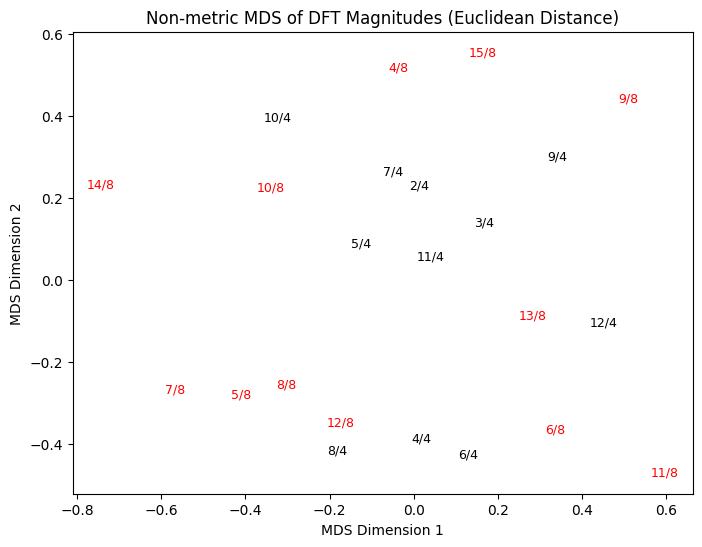

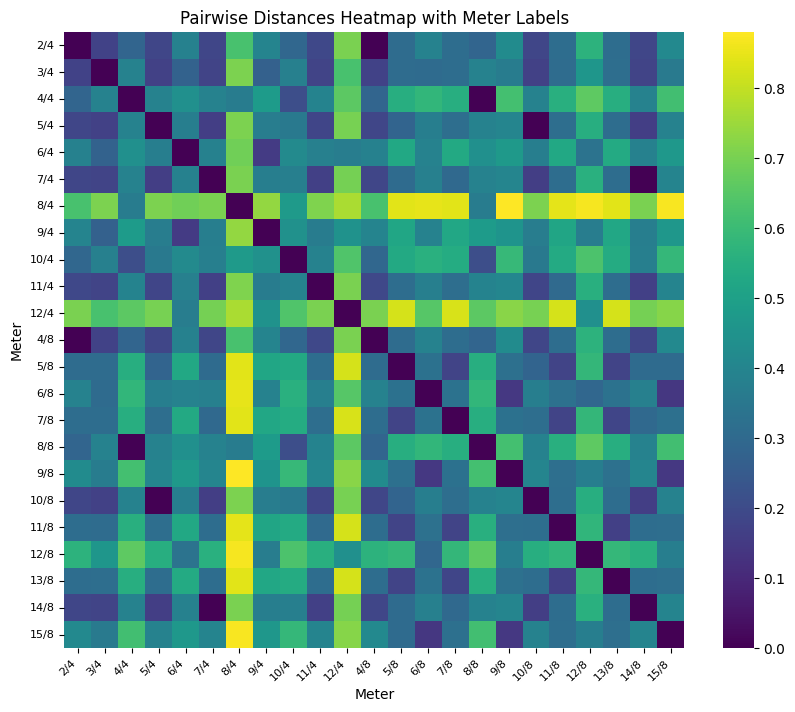

Stress for Non-metric MDS of DFT Phases (Euclidean Distance): 0.262365659131182


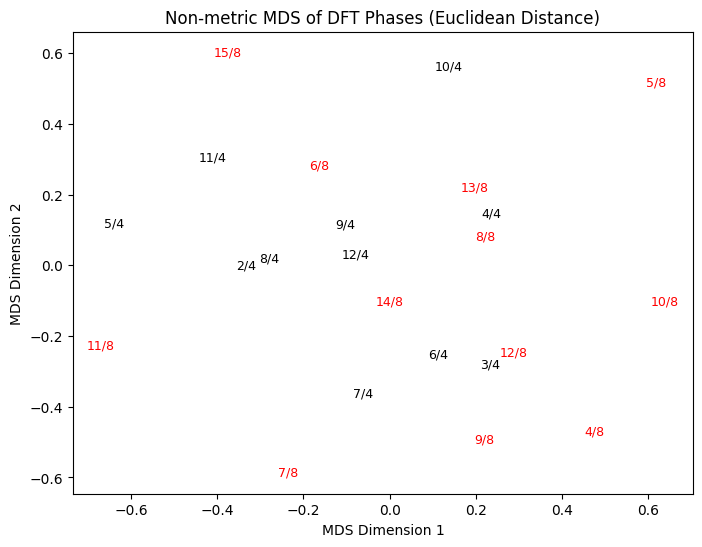

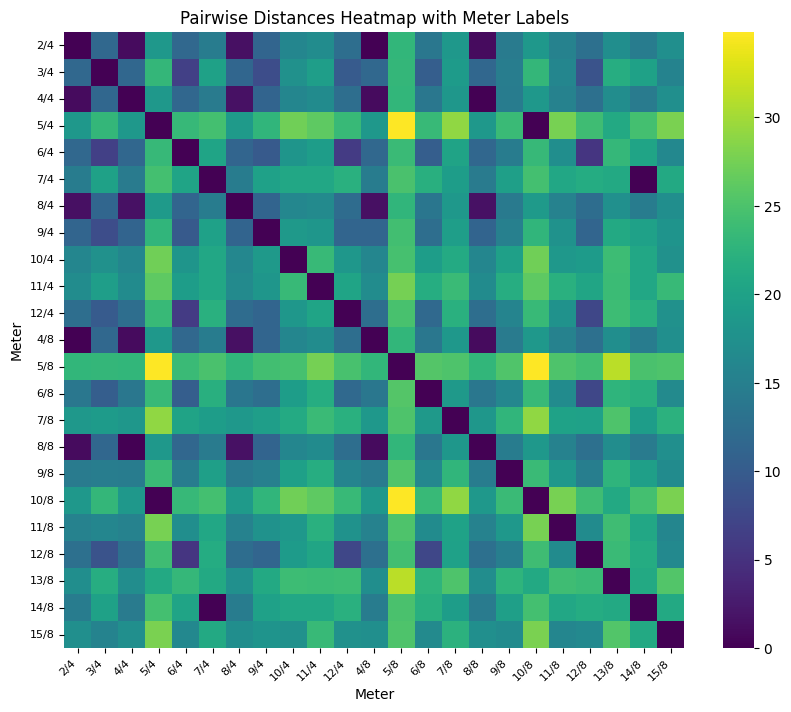

Stress for Non-metric MDS of DFT Unwrapped Phases (Euclidean Distance): 0.26084566905408496


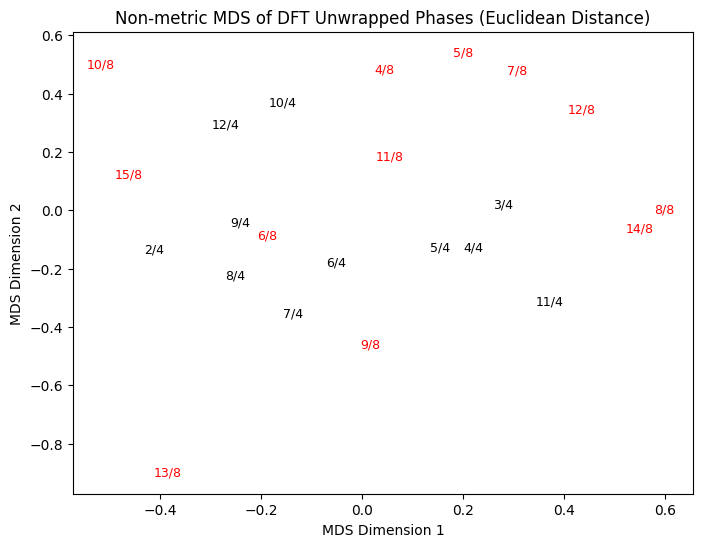

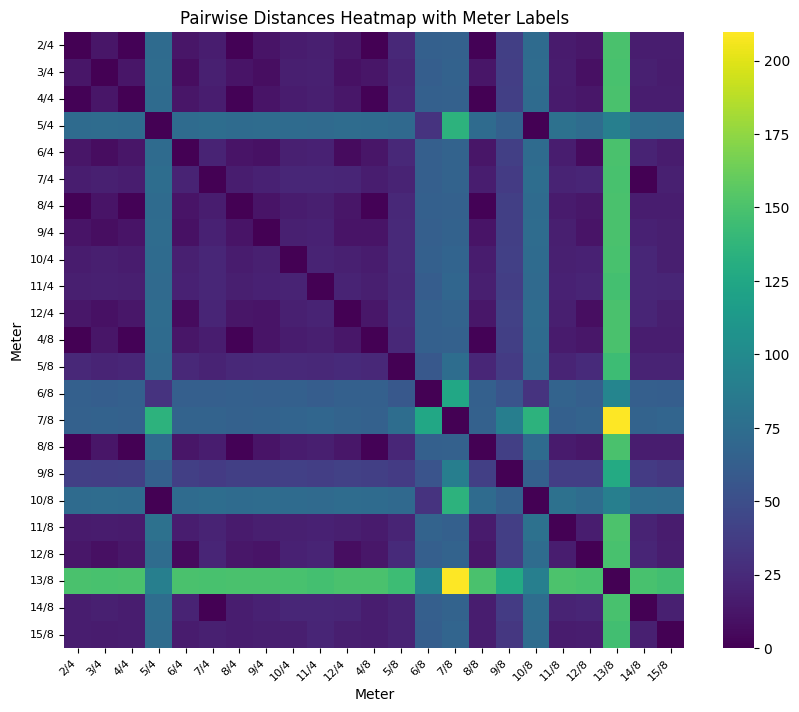

Stress for Non-metric MDS of DFT Complex Numbers (Euclidean Distance): 0.2668288541594697


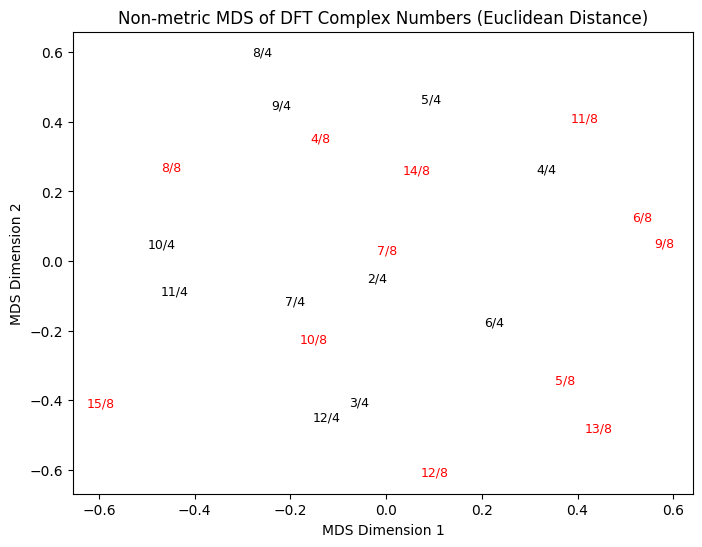

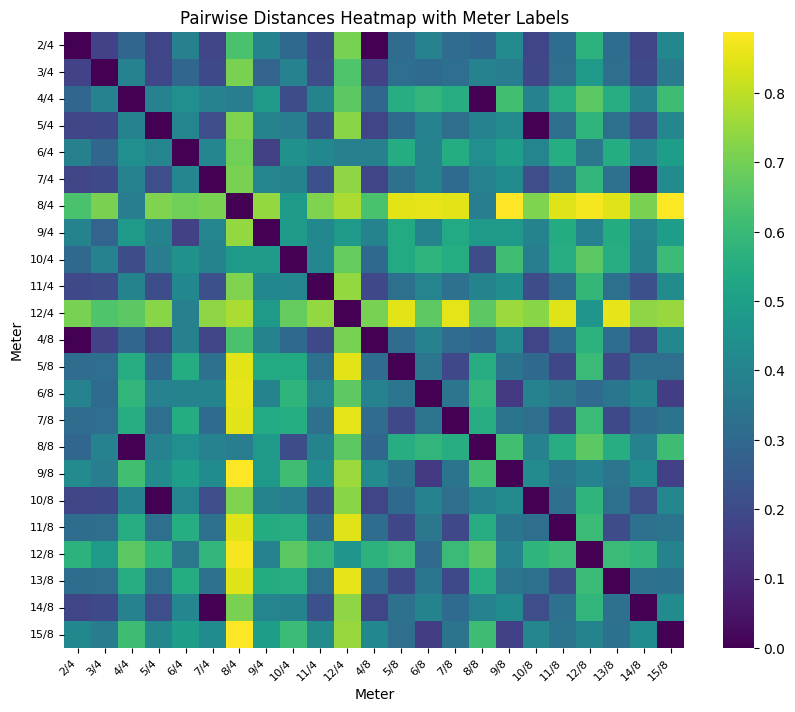

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_mds(df, column_name, title):
    """Computes and visualizes Non-metric MDS for a given column."""

    # 1. Compute pairwise distances using Euclidean distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist

    # 2. Apply non-metric MDS
    embedding = MDS(n_components=2, dissimilarity='precomputed', metric=False)
    transformed_data = embedding.fit_transform(distances)

    # Print the stress value
    print(f"Stress for {title}: {embedding.stress_}")

    # 3. Visualize the MDS results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Use 'Meter' column for labels and change color
    for i in range(len(df)):
        label = df['Meter'].iloc[i]  # Get label from 'Meter' column
        color = 'red' if label.endswith('8') else 'black'  # Set color based on label
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)
    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')

    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)
    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_mds(df, 'DFT Magnitude', 'Non-metric MDS of DFT Magnitudes (Euclidean Distance)')
compute_and_visualize_mds(df, 'DFT Phase', 'Non-metric MDS of DFT Phases (Euclidean Distance)')
compute_and_visualize_mds(df, 'DFT Phase_Unwrap', 'Non-metric MDS of DFT Unwrapped Phases (Euclidean Distance)')
compute_and_visualize_mds(df, 'DFT', 'Non-metric MDS of DFT Complex Numbers (Euclidean Distance)')

####UMAP Euclidean Distance PDF export

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


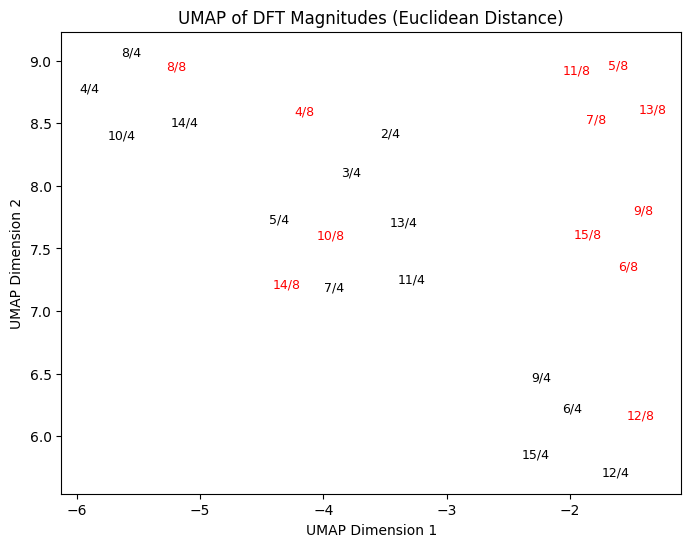

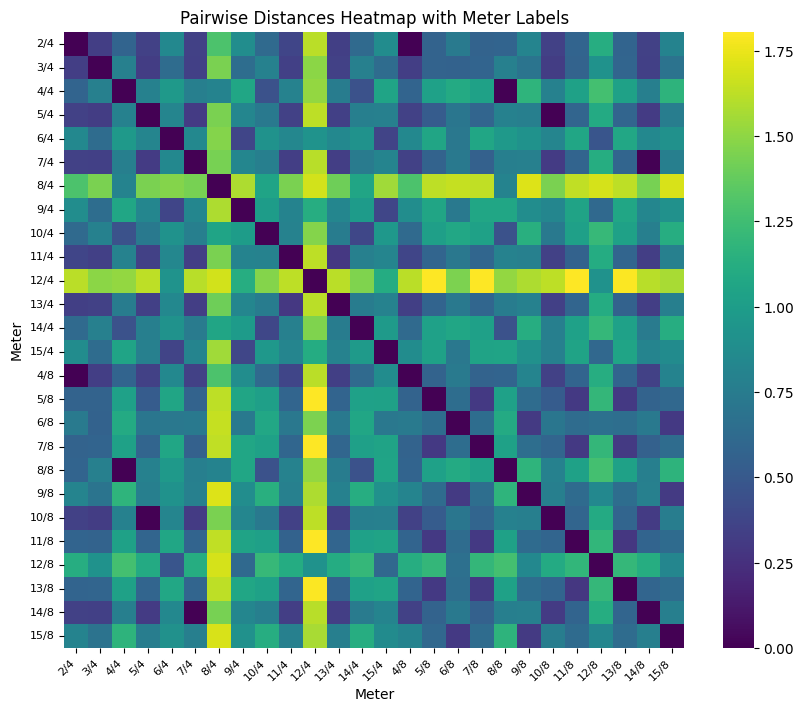

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


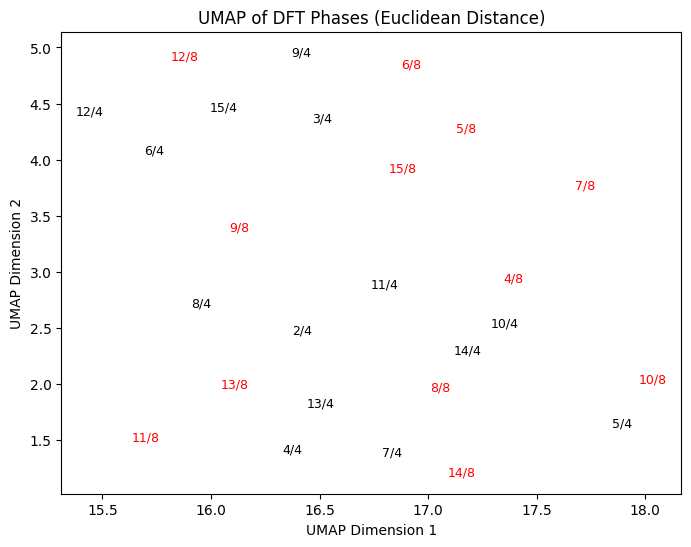

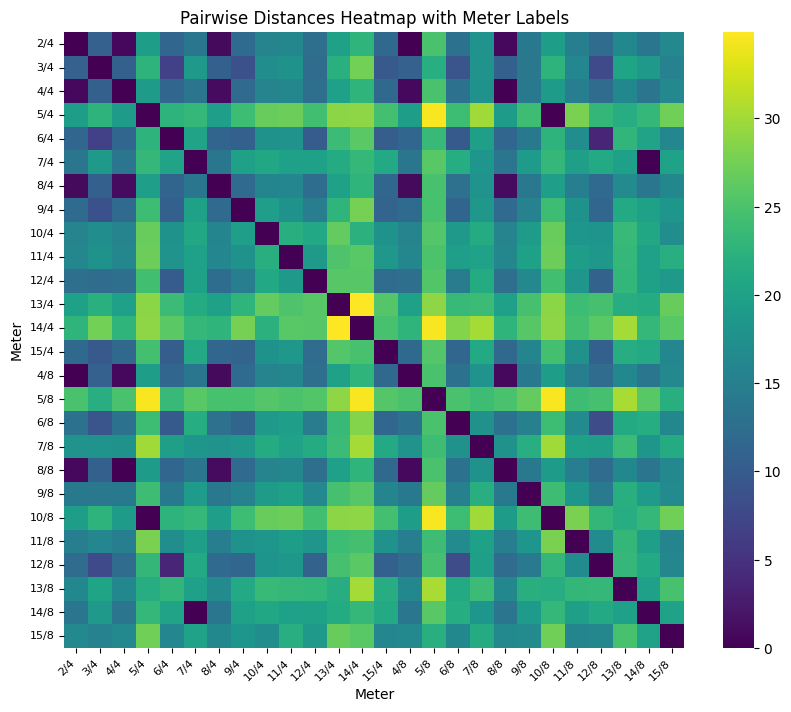

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


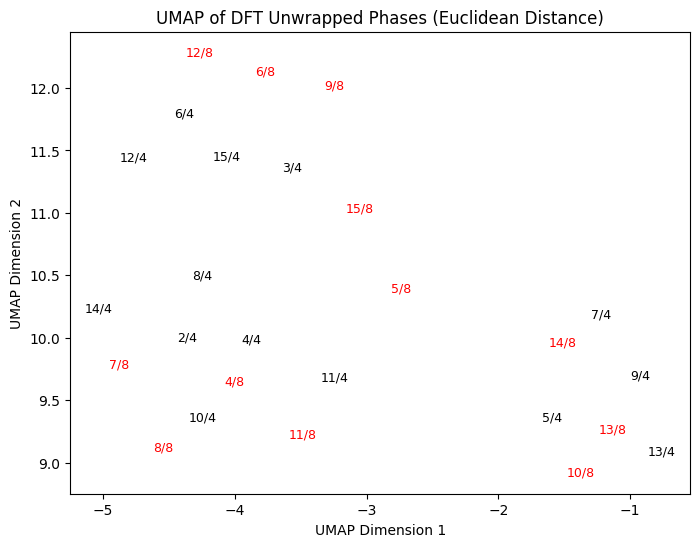

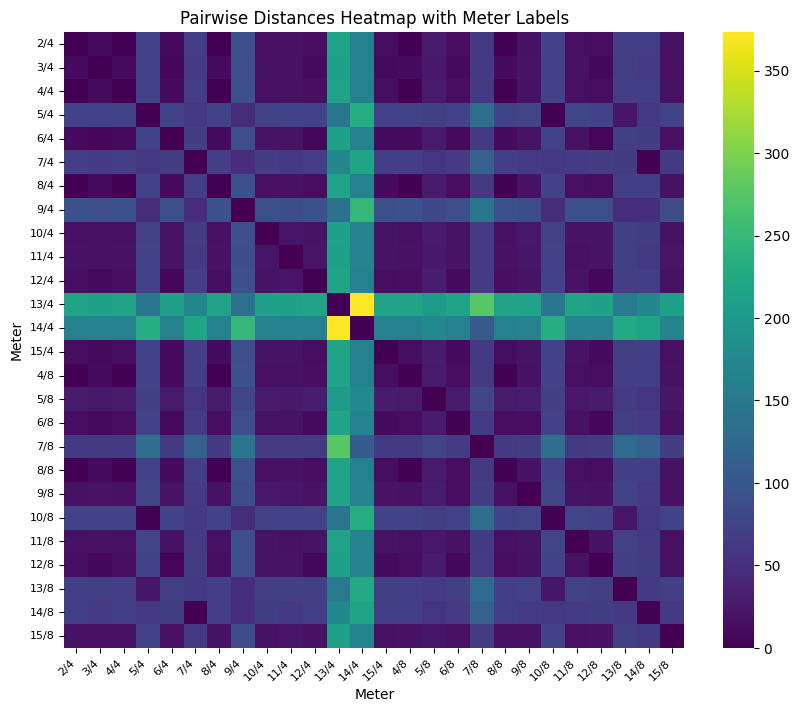

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


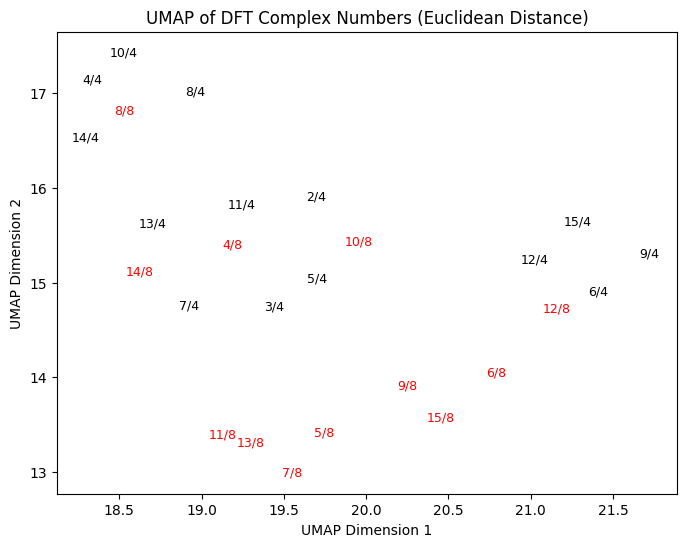

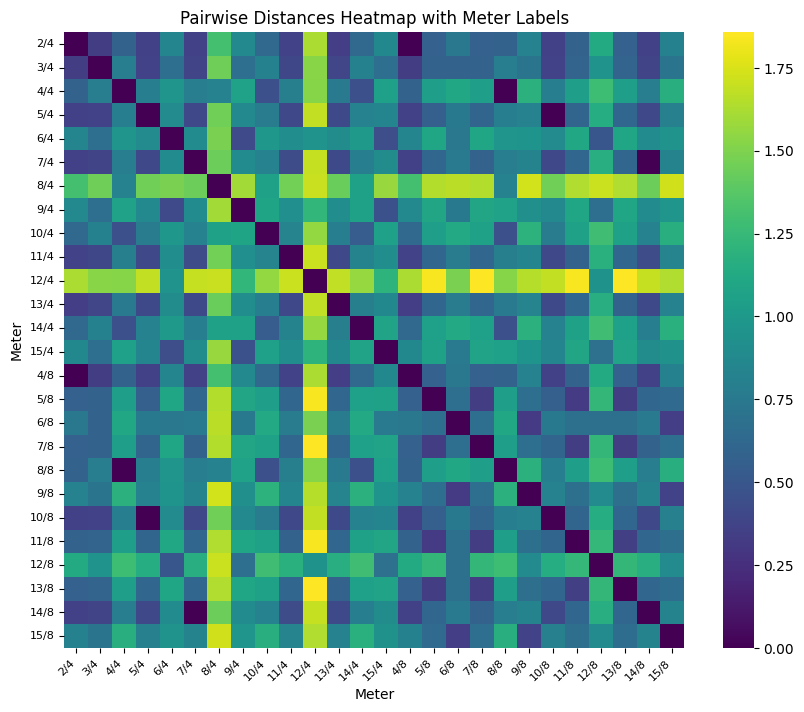

In [ ]:
!pip install umap-learn

import pandas as pd
import numpy as np
import umap # Import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_umap(df, column_name, title):
    """Computes and visualizes Non-metric MDS for a given column."""

    # 1. Compute pairwise distances using Euclidean distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            dist = np.linalg.norm(np.array(df.iloc[i][column_name]) - np.array(df.iloc[j][column_name]))
            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist

    # 2. Apply UMAP
    reducer = umap.UMAP(n_components=2, metric='precomputed') # Initialize UMAP with precomputed distances
    transformed_data = reducer.fit_transform(distances)

    # 3. Visualize the UMAP results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Use 'Meter' column for labels and change color
    for i in range(len(df)):
        label = df['Meter'].iloc[i]  # Get label from 'Meter' column
        color = 'red' if label.endswith('8') else 'black'  # Set color based on label
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1') # Update x-axis label
    ax.set_ylabel('UMAP Dimension 2') # Update y-axis label


    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)
    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_umap(df, 'DFT Magnitude', 'UMAP of DFT Magnitudes (Euclidean Distance)')
compute_and_visualize_umap(df, 'DFT Phase', 'UMAP of DFT Phases (Euclidean Distance)')
compute_and_visualize_umap(df, 'DFT Phase_Unwrap', 'UMAP of DFT Unwrapped Phases (Euclidean Distance)')
compute_and_visualize_umap(df, 'DFT', 'UMAP of DFT Complex Numbers (Euclidean Distance)')

####MDS Cosine Distance PDF Export

Stress for Non-metric MDS of DFT Magnitudes (Cosine Distance): 0.2724400459189274


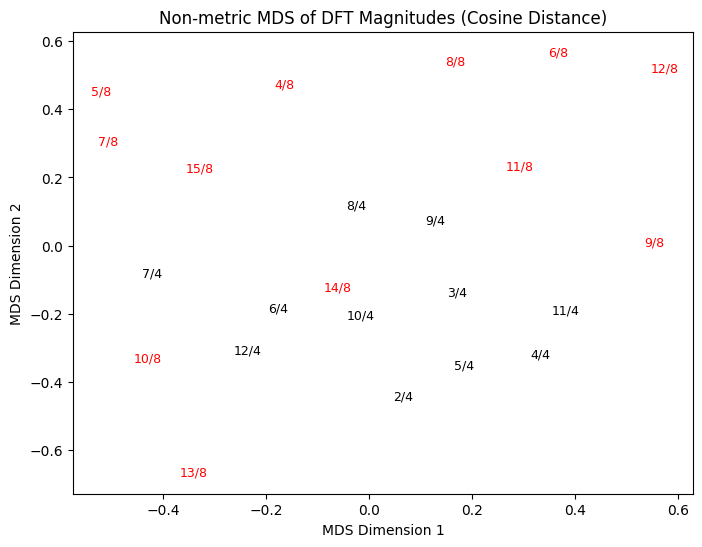

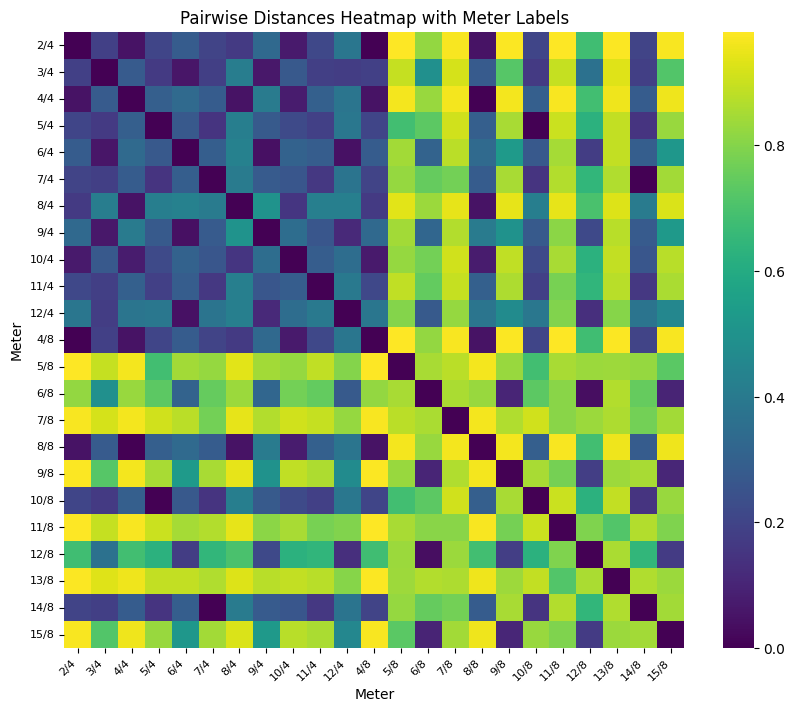

Stress for Non-metric MDS of DFT Phases (Cosine Distance): 0.27420883531448875


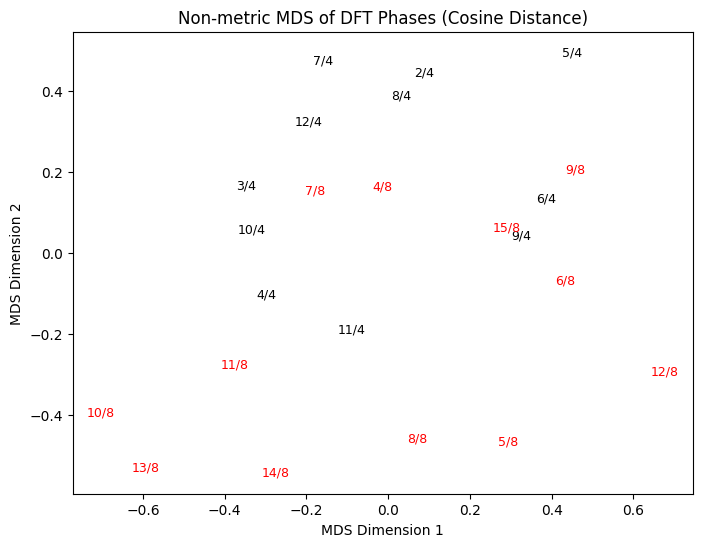

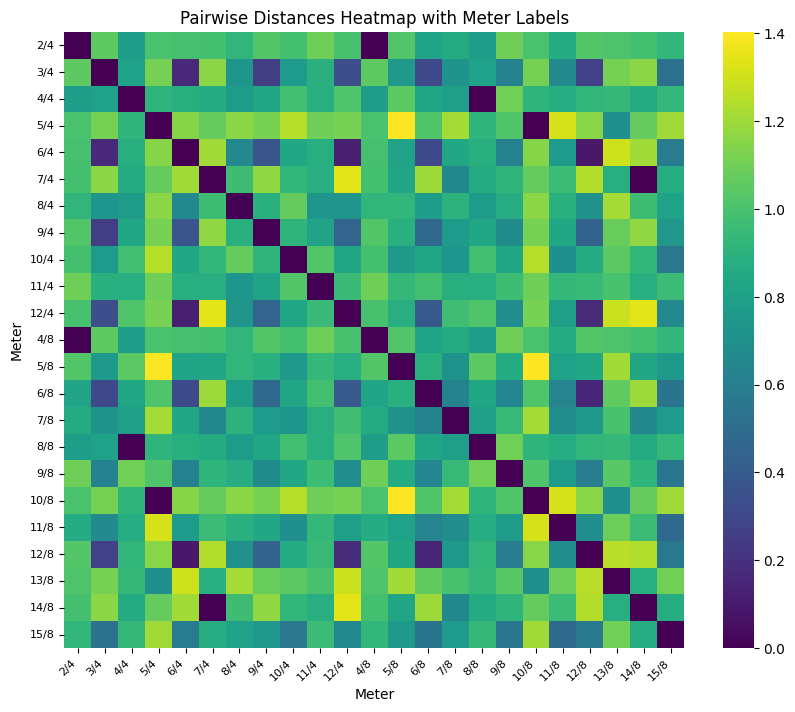

Stress for Non-metric MDS of DFT Unwrapped Phases (Cosine Distance): 0.2760940608457075


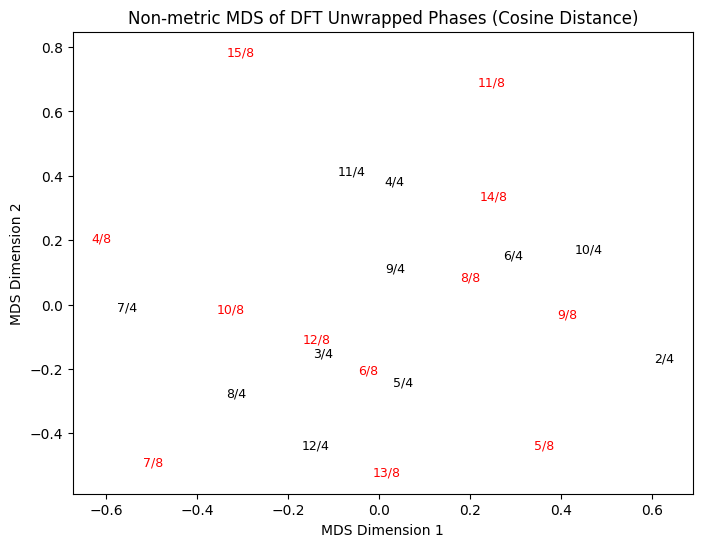

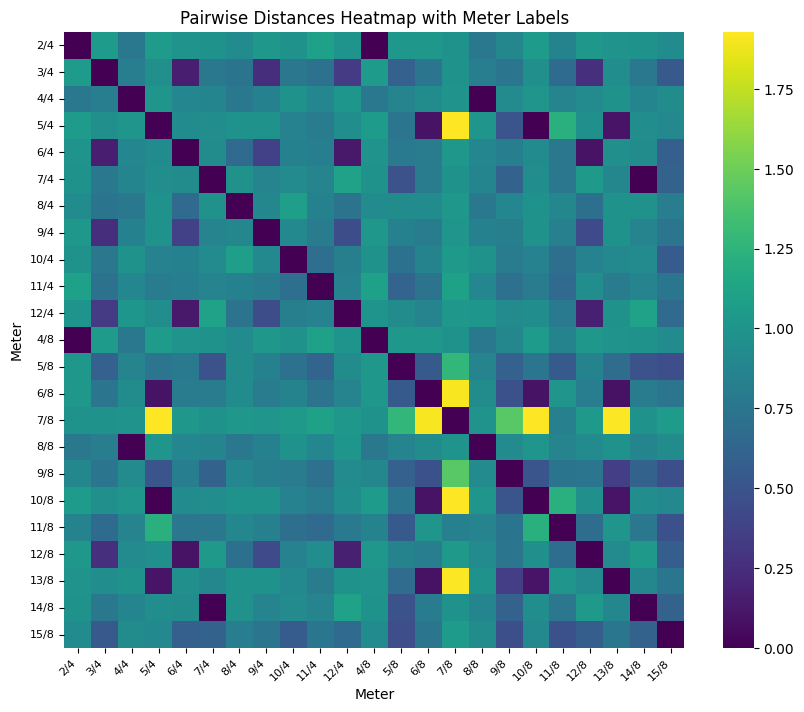

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module
from scipy.spatial.distance import cosine # Import the cosine function


def compute_and_visualize_mds(df, column_name, title):
    """Computes and visualizes Non-metric MDS for a given column."""

    # 1. Compute pairwise distances using Cosine distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            # Convert lists to NumPy arrays for cosine calculation
            u = np.array(df.iloc[i][column_name])
            v = np.array(df.iloc[j][column_name])

            # Handle zero vectors to avoid division by zero
            if np.all(u == 0) or np.all(v == 0):
                dist = 1.0  # Cosine distance is 1 for zero vectors
            else:
                dist = cosine(u, v)  # Calculate cosine distance

            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist  # Ensure symmetry

    # 2. Apply non-metric MDS
    embedding = MDS(n_components=2, dissimilarity='precomputed', metric=False)
    transformed_data = embedding.fit_transform(distances)

    # Print the stress value
    print(f"Stress for {title}: {embedding.stress_}")

    # 3. Visualize the MDS results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Update this part to use 'Meter' column for labels and change color
    for i in range(len(df)):
        label = df['Meter'].iloc[i]  # Get label from 'Meter' column
        color = 'red' if label.endswith('8') else 'black'  # Set color based on label
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)
    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')

    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)
    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save MDS plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_mds(df, 'DFT Magnitude', 'Non-metric MDS of DFT Magnitudes (Cosine Distance)')
compute_and_visualize_mds(df, 'DFT Phase', 'Non-metric MDS of DFT Phases (Cosine Distance)')
compute_and_visualize_mds(df, 'DFT Phase_Unwrap', 'Non-metric MDS of DFT Unwrapped Phases (Cosine Distance)')
# compute_and_visualize_mds(df, 'DFT', 'Non-metric MDS of DFT Complex Numbers (Cosine Distance)')

####UMAP Cosine Distance PDF Export

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


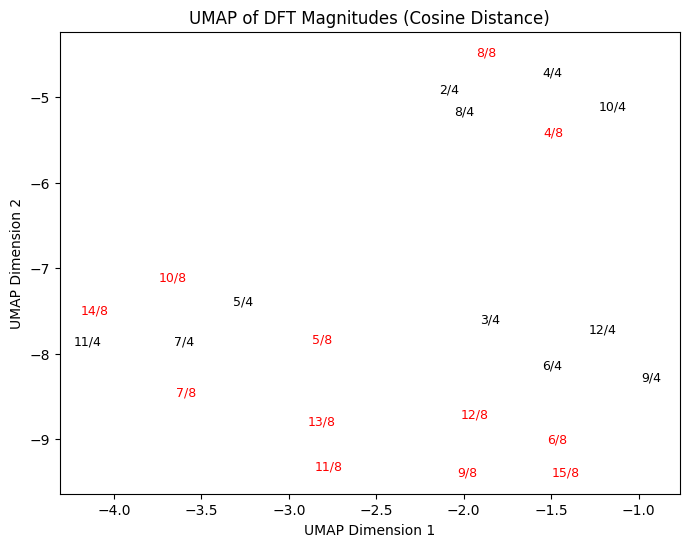

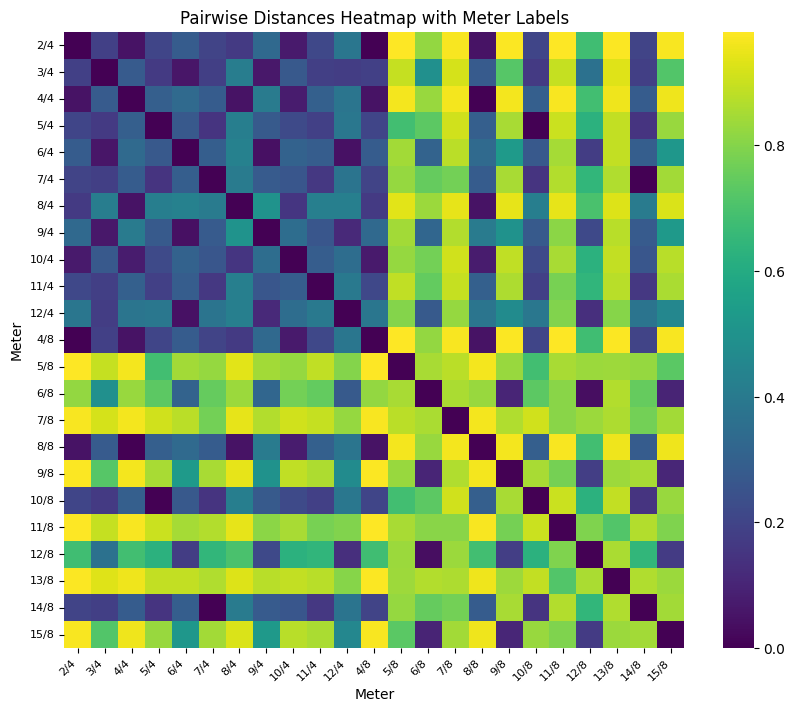

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


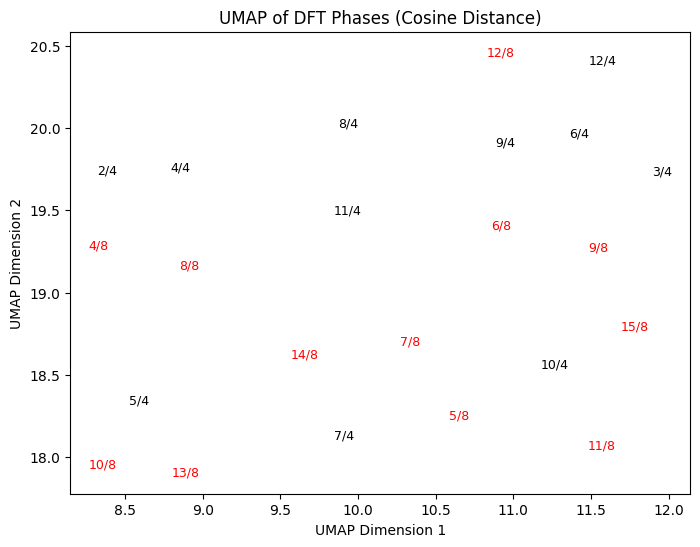

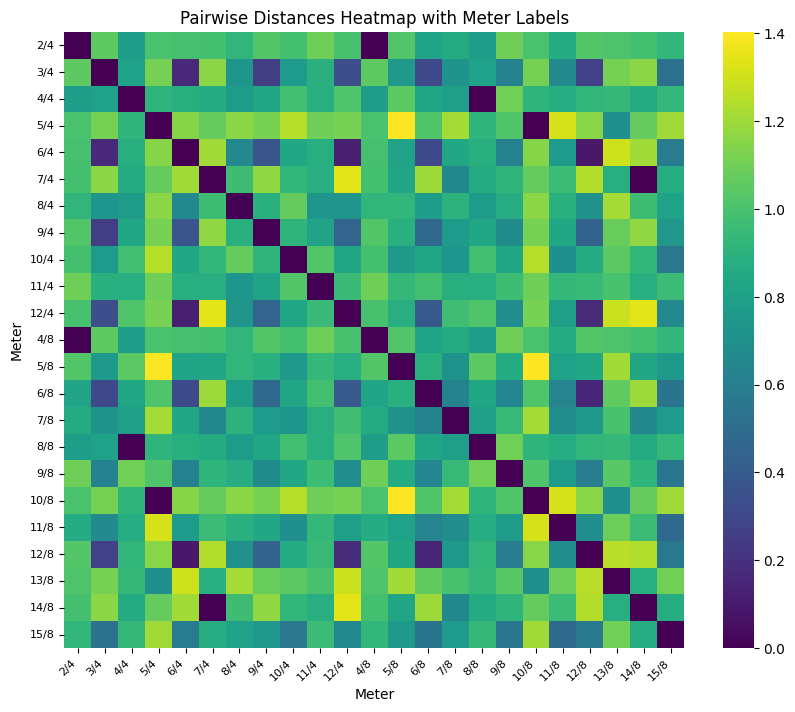

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


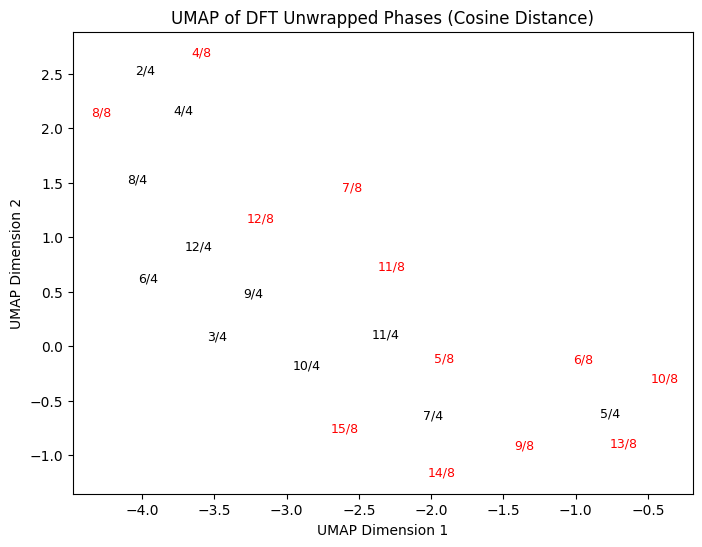

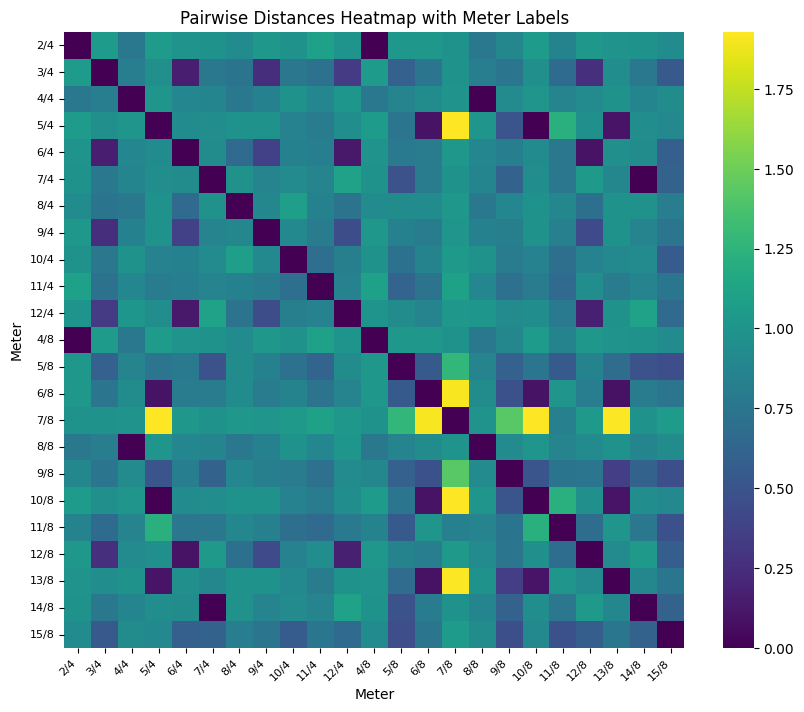

In [ ]:
#!pip install umap-learn

import pandas as pd
import numpy as np
import umap # Import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module
from scipy.spatial.distance import cosine # Import the cosine function


def compute_and_visualize_umap(df, column_name, title):
    """Computes and visualizes UMAP for a given column."""

    # 1. Compute pairwise distances using Cosine distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            # Convert lists to NumPy arrays for cosine calculation
            u = np.array(df.iloc[i][column_name])
            v = np.array(df.iloc[j][column_name])

            # Handle zero vectors to avoid division by zero
            if np.all(u == 0) or np.all(v == 0):
                dist = 1.0  # Cosine distance is 1 for zero vectors
            else:
                dist = cosine(u, v)  # Calculate cosine distance

            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist  # Ensure symmetry

    # 2. Apply UMAP
    reducer = umap.UMAP(n_components=2, metric='precomputed') # Initialize UMAP with precomputed distances
    transformed_data = reducer.fit_transform(distances)

    # 3. Visualize the UMAP results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Update this part to use 'Meter' column for labels and change color
    for i in range(len(df)):
        label = df['Meter'].iloc[i]  # Get label from 'Meter' column
        color = 'red' if label.endswith('8') else 'black'  # Set color based on label
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1') # Update x-axis label
    ax.set_ylabel('UMAP Dimension 2') # Update y-axis label

    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)
    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save UMAP plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_umap(df, 'DFT Magnitude', 'UMAP of DFT Magnitudes (Cosine Distance)')
compute_and_visualize_umap(df, 'DFT Phase', 'UMAP of DFT Phases (Cosine Distance)')
compute_and_visualize_umap(df, 'DFT Phase_Unwrap', 'UMAP of DFT Unwrapped Phases (Cosine Distance)')
# compute_and_visualize_umap(df, 'DFT', 'UMAP of DFT Complex Numbers (Cosine Distance)')

####t-SNE Cosine Distance PDF export

KL divergence for UMAP of DFT Magnitudes (Cosine Distance): 0.43458202481269836


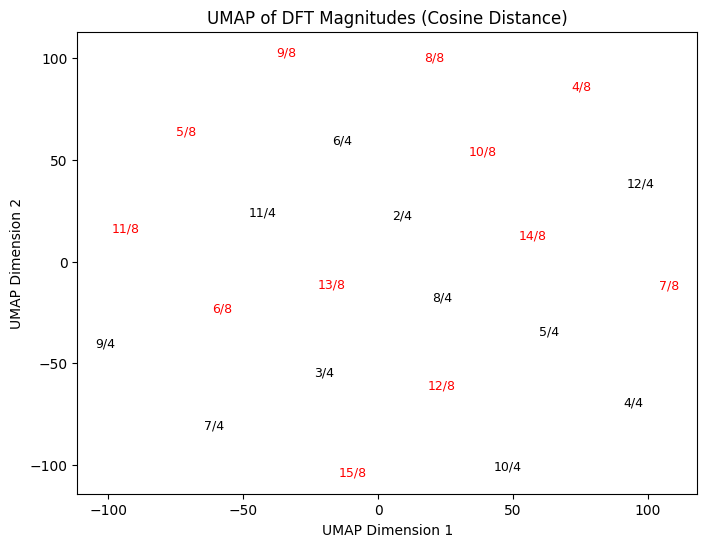

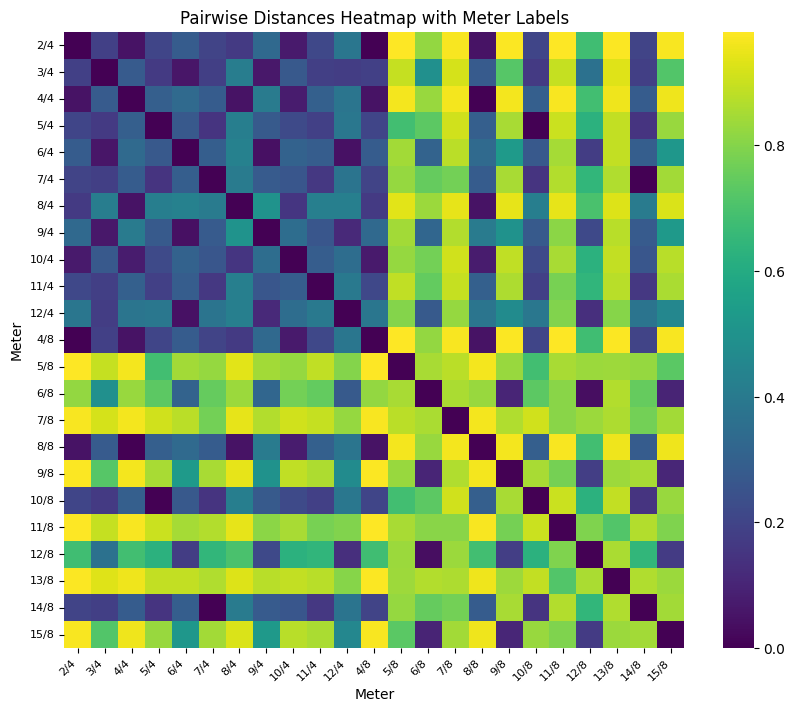

KL divergence for UMAP of DFT Phases (Cosine Distance): 0.43921607732772827


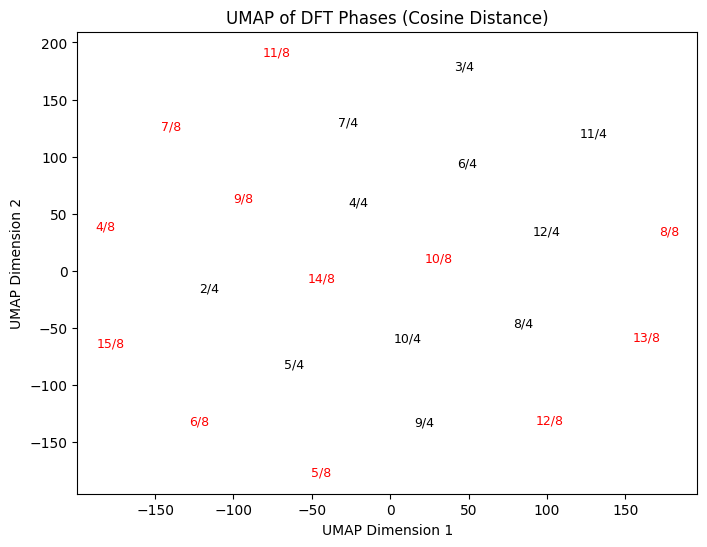

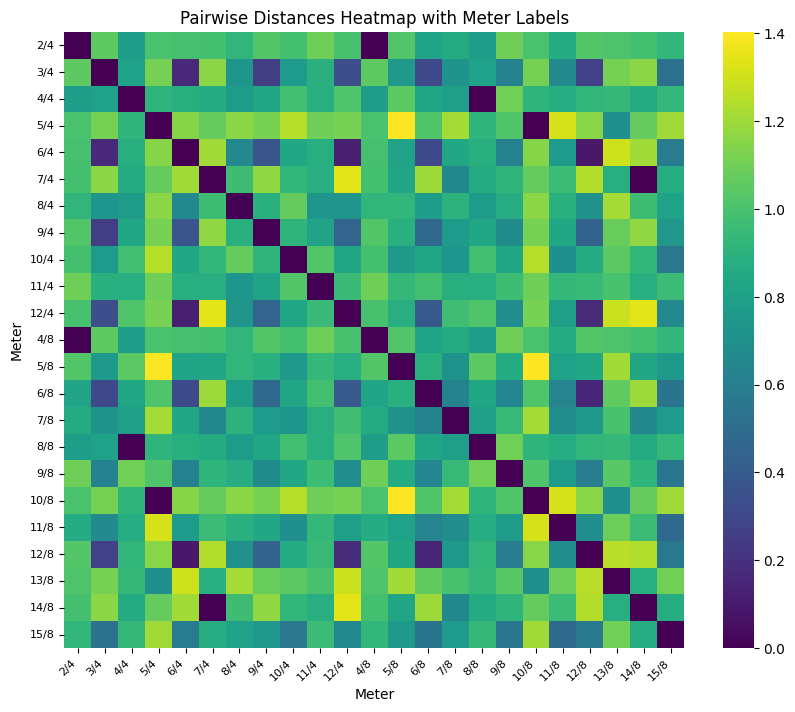

KL divergence for UMAP of DFT Unwrapped Phases (Cosine Distance): 0.4909740388393402


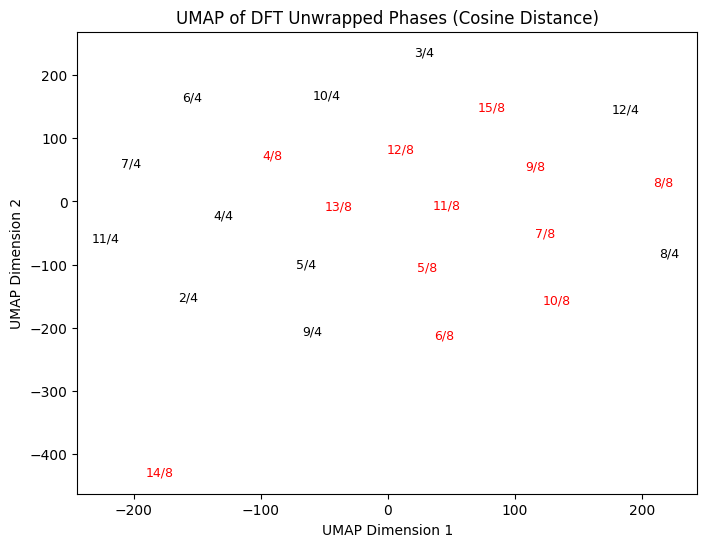

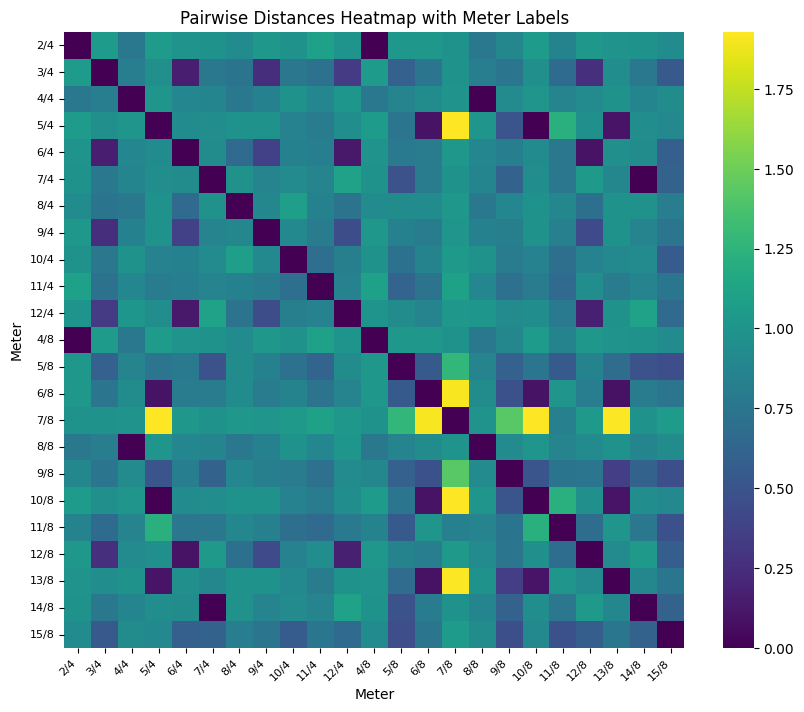

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE # Import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os  # Import the os module


def compute_and_visualize_tsne(df, column_name, title): # Rename function
    """Computes and visualizes t-SNE for a given column."""

    # 1. Compute pairwise distances using Cosine distance
    distances = pd.DataFrame(np.zeros((len(df), len(df))))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            # Convert lists to NumPy arrays for cosine calculation
            u = np.array(df.iloc[i][column_name])
            v = np.array(df.iloc[j][column_name])

            # Handle zero vectors to avoid division by zero
            if np.all(u == 0) or np.all(v == 0):
                dist = 1.0  # Cosine distance is 1 for zero vectors
            else:
                dist = cosine(u, v)  # Calculate cosine distance

            distances.iloc[i, j] = dist
            distances.iloc[j, i] = dist  # Ensure symmetry

    # 2. Apply t-SNE (replace MDS with TSNE)
    # Set perplexity to be less than the number of samples
    perplexity_value = min(30, len(df) - 1)  # Choose the smaller value between 30 and n_samples - 1
    embedding = TSNE(n_components=2, metric='precomputed', perplexity=perplexity_value, init='random') # Use 'random' initialization
    transformed_data = embedding.fit_transform(distances)

    # Print the KL divergence (t-SNE doesn't have stress)
    print(f"KL divergence for {title}: {embedding.kl_divergence_}")

    # 3. Visualize the t-SNE results
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0)

    # Use 'Meter' column for labels and change color
    for i in range(len(df)):
        label = df['Meter'].iloc[i]  # Get label from 'Meter' column
        color = 'red' if label.endswith('8') else 'black'  # Set color based on label
        ax.text(transformed_data[i, 0], transformed_data[i, 1], label,
                fontsize=9, ha='center', va='center', color=color)

    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1') # Update x-axis label
    ax.set_ylabel('UMAP Dimension 2') # Update y-axis label

    # Plot the distance matrix with Meter labels
    meter_labels = df['Meter'].tolist()  # Get the list of meter labels

    fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', fmt=".2f",
                xticklabels=meter_labels, yticklabels=meter_labels, ax=ax_heatmap)
    ax_heatmap.set_title('Pairwise Distances Heatmap with Meter Labels')
    ax_heatmap.set_xlabel("Meter")
    ax_heatmap.set_ylabel("Meter")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels vertical
    plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust labelsize as needed

    # Create a safe filename from the title
    safe_title = "".join(c for c in title if c.isalnum() or c in "._- ")  # Allow alphanumeric, spaces, and some punctuation
    pdf_filename = f"/content/drive/MyDrive/Colab Notebooks/{safe_title}.pdf"

    # Export to PDF
    with PdfPages(pdf_filename) as pdf:  # Use the generated filename
        pdf.savefig(fig)  # Save UMAP plot
        pdf.savefig(fig_heatmap)  # Save heatmap

    plt.show()  # Show both plots at the end


# Apply the function for DFT Magnitudes, DFT Phase, and DFT Phase_Unwrap
compute_and_visualize_tsne(df, 'DFT Magnitude', 'UMAP of DFT Magnitudes (Cosine Distance)')
compute_and_visualize_tsne(df, 'DFT Phase', 'UMAP of DFT Phases (Cosine Distance)')
compute_and_visualize_tsne(df, 'DFT Phase_Unwrap', 'UMAP of DFT Unwrapped Phases (Cosine Distance)')
# compute_and_visualize_tsne(df, 'DFT', 'UMAP of DFT Complex Numbers (Cosine Distance)')